# Lab 08

## Students
- Flavia Pittet
- Fabio Vitali

## 1. The Perceptron and the Delta rule
Read each notebook material (see list below), follow the instructions, play with the code,
program the proposed problems and answer the questions.

### 1_activation_function.ipynb 
- Observe the shape of the different activation functions proposed.

- Observe the effects of modifying the weight. How the shape of the function changes? How the first derivative changes?

- Implement the activation function of a rectified Linear Unit (ReLU)

$$ f(x) = \left \{
\begin{array}{rcl}
	0 & \mbox{for} & x < 0\\
	x & \mbox{for} & x \ge 0
\end{array} \right.
\hspace{1cm}
f'(x) = \left \{
\begin{array}{rcl}
	0 & \mbox{for} & x < 0\\
	1 & \mbox{for} & x \ge 0
\end{array} \right.
$$



In [1]:
import numpy as np
import matplotlib.pyplot as pl
from ipywidgets import interact, widgets

%matplotlib inline

def leru(neta):
    output = np.maximum(neta, 0)
    d_output = np.greater_equal(neta, np.zeros(len(neta))).astype(np.float)
    return (output, d_output)

activation_functions_dict = {

    'LeRU': leru
}

input_values = np.arange(-10, 10, 0.05)

def plot_activation_function(activation_function_index, weight):
    neta = weight * input_values
    
    activation_function = activation_functions_dict.get(list(activation_functions_dict.keys())[activation_function_index])
    output_value, d_output_value = activation_function(neta)
    
    pl.figure(figsize=(8,6))
    pl.plot(input_values, output_value,                                         c='b', label='output')
    pl.plot(input_values, weight * d_output_value,                              c='r', label='first derivative')
    pl.xlabel('Input value')
    pl.ylabel('Output value')
    pl.ylim(-1.1, 1.1)
    pl.legend(loc=4)
    pl.grid()
    

- Visualize the ReLu activation function using the tools given in this notebook

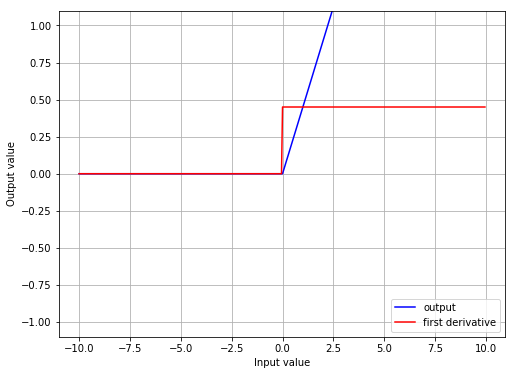

In [2]:
plot_activation_function(0, 0.45)

### 4_delta_rule.ipynb or 4_1_delta_rule_points.ipynb (if the right-click does not work)

You are free to modify the learning rate (ALPHA) and the number of iterations (NUMBER_OF_EPOCHS).

Try different 2D classification problems and observe the behaviour of the algorithm in terms of:
- Learning rate needed
- Convergence speed
- Oscillations

Bare in mind that, in the current implementation, the parameters (weights and bias) are initialized randomly every time you launch the cell.

Create dataset as shown and perform the following tests:

1. What happens if the boundaries between both classes are well defined?
The perceptron error gets very close to zero and very fast.
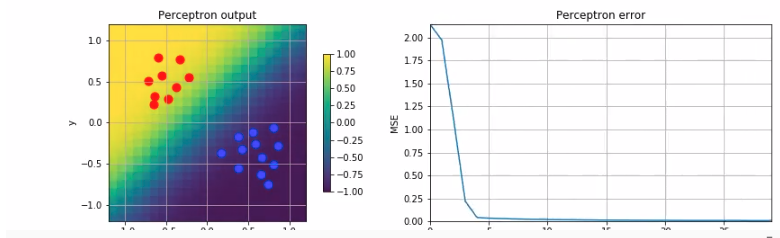
2. What happens if the classes overlap? What could you say about oscillations in the error signal?
it keeps adjusting until it finds a good match, but it's not too close to zero because it's impossible to delimitate them perfectly with a linear system.
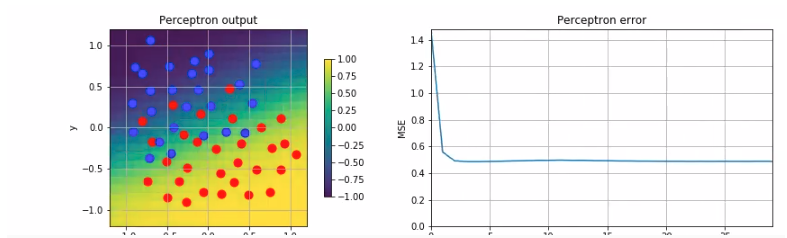
3. What happens if it is not possible to separate the classes with a single line? What could you say about local minima?
The minimal error rate with this system is not interesting, considering the fact that we're using a linear function, it's impossible to get a good error rate. We could find different local minima depending on the initial random weight's values,  but it's always excluding one group of points, no matter how many times we excecute it.

first excecution
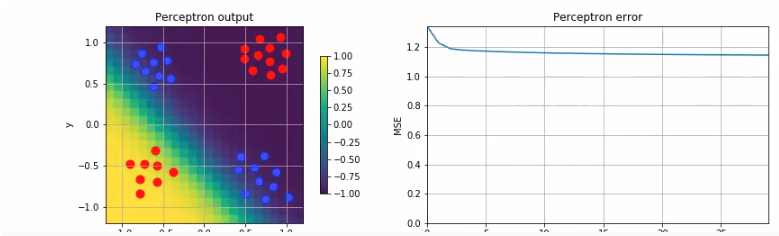

second excecution

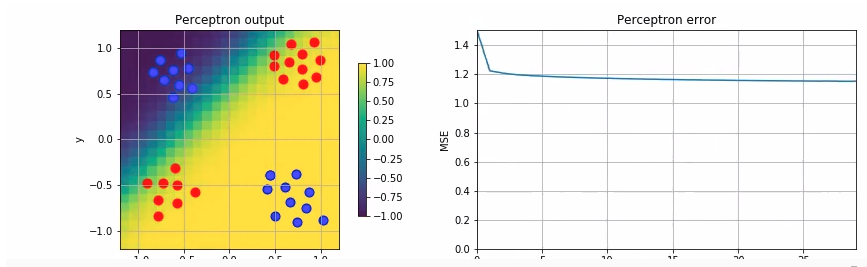

## 2. Backpropagation
### 5_Backpropagation

You are free to modify the learning rate (ALPHA) and the number of iterations (NUMBER_OF_EPOCHS).

Try different 2D classification problems and observe the behaviour of the algorithm in terms of:
- Learning rate needed
- Convergence speed
- Oscillations

Bare in mind that, in the current implementation, the parameters (weights and bias) are initialized randomly every time you launch the cell

1. What happens if the boundaries between both classes are well defined?
No problem seems to apear, the error rate is very close to 0.
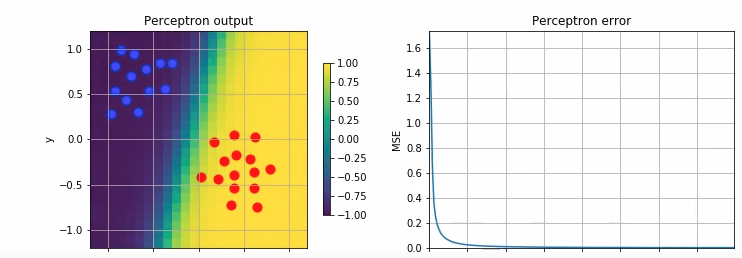
2. What happens if the classes overlap? What could you say about oscillations in the error signal?
It adjusts until if finds the right fit, we didn't notice a lot of oscilliations because we have the same amount of  red  points in the blue section and blue in the red section. In order to get more oscilliations, we need to up the EPOCH and have more distributed points.
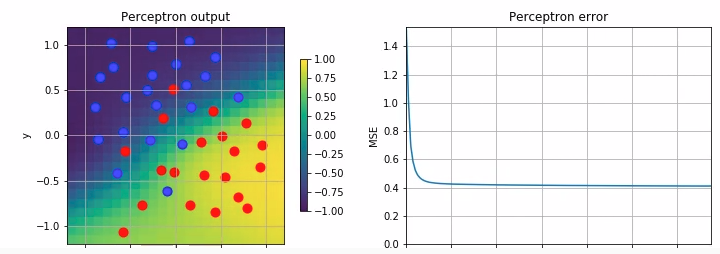
3. What happens if it is not possible to separate the classes with a single line? What could you say about local minima
This time, the system manages to get it right. The local minima isn't a defining factor and works each time we excecute the code.
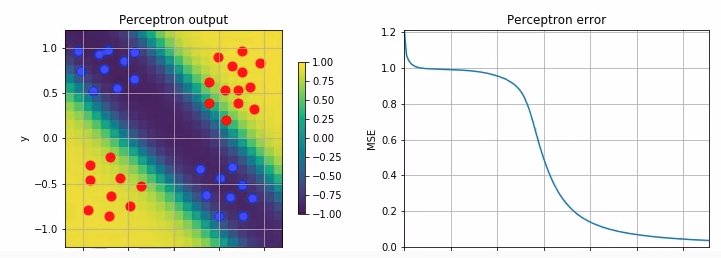
4. What happens if the points of one of the classes are separated in subgroups (blobs)?
nothing special happens, the system gets an error rate very close to zero.
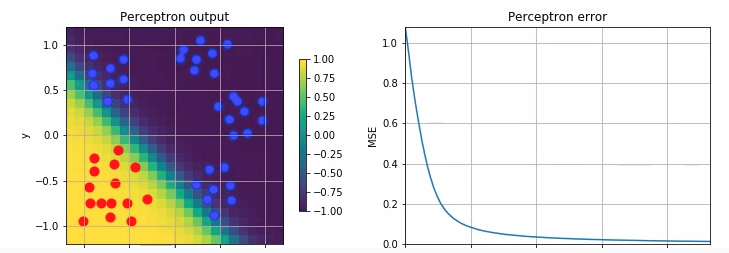

### 6_Backpropagation and the MLP

Modify the class MLP provided in this notebook to include the momentum term in the function `fit`:

~~~
fit(self, X, y, learning_rate=0.1, momentum=0.5, epochs=100):
~~~

Modify the behaviour of the function accordingly. Use the `momentum` constant to modulate the previous Δw which has to be added to the current Δw.

Save the resulting code in a file named `mlp_backprop_momentum.py`. This file will be used in the next laboratory.

## 4. Crossvalidation

### Run notebooks 7 and 8, provide the final plots MSE vs spread and comment the difference between results

The cross validation gets better results with the K-fold. 

Cross validation results
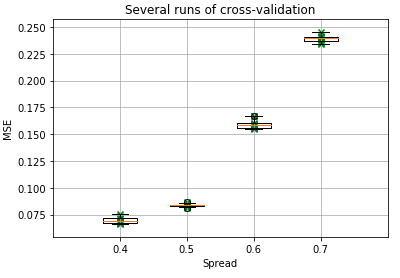


Hold out validation results

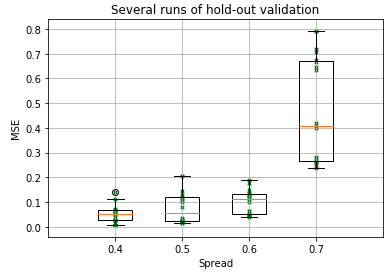


## 5. Model building

Run notebook 9 for three different spread values (e.g., 0.3, 0.5 and 0.7), describe the final model chosen and justify your selection (e.g., based on the plots of MSE vs parameters)


When the MSE starts to go up and reaches 4 or 5 neurons on the test set is when we
The MSE goes up --> 4 or 5 neurons on test set so we have to stop. 

spread 0.3

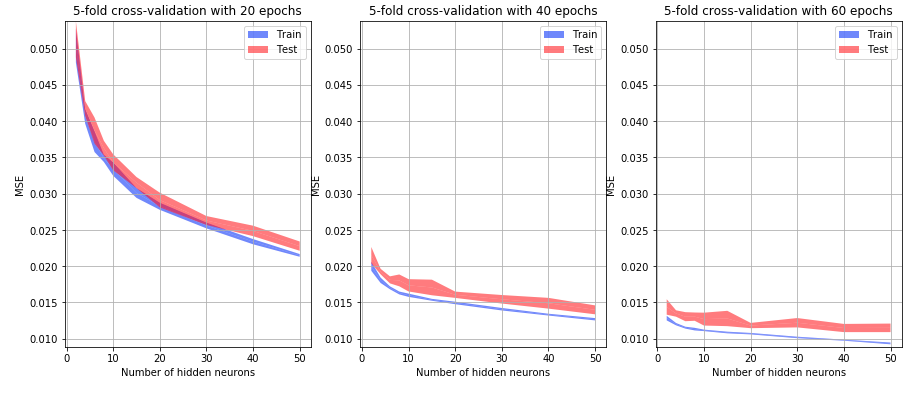

spread 0.4

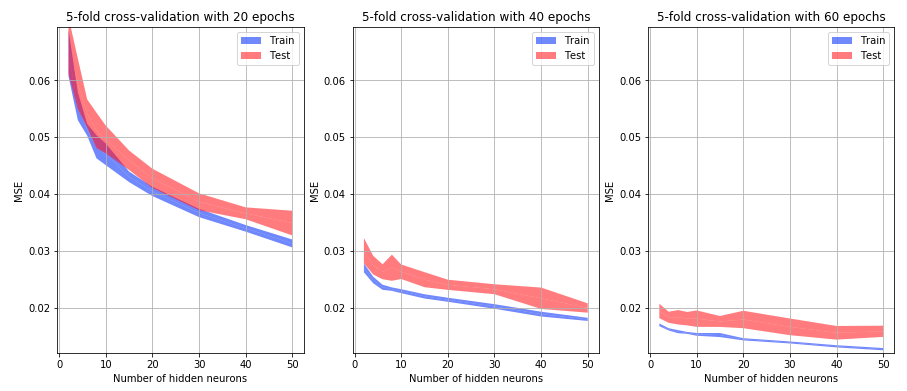

spread 0.5

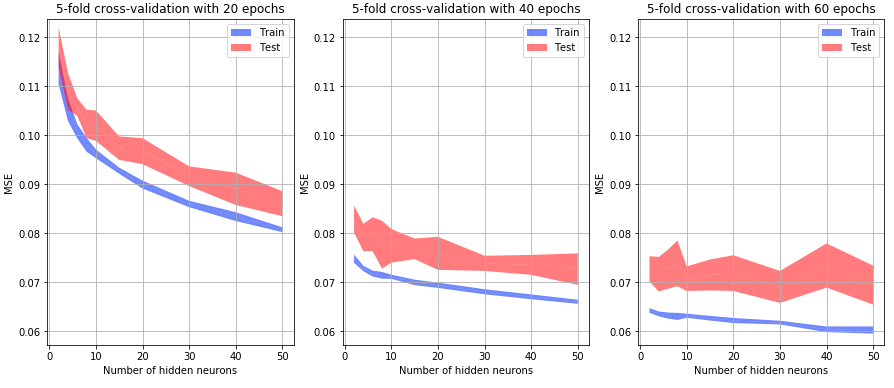

spread 0.6

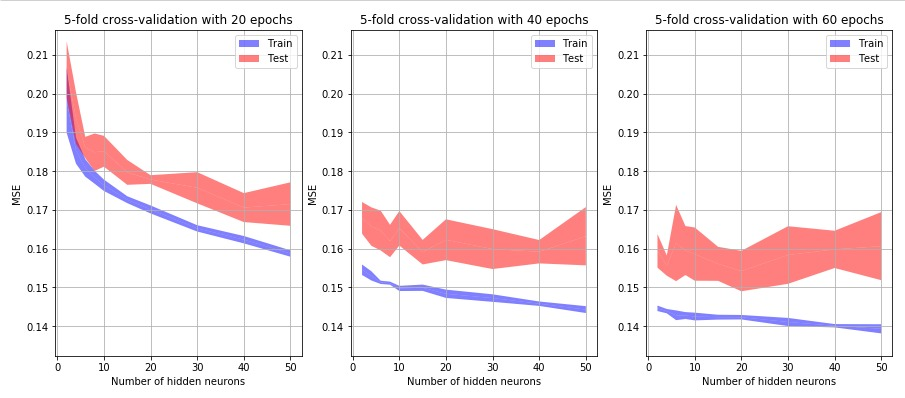

spread 0.7

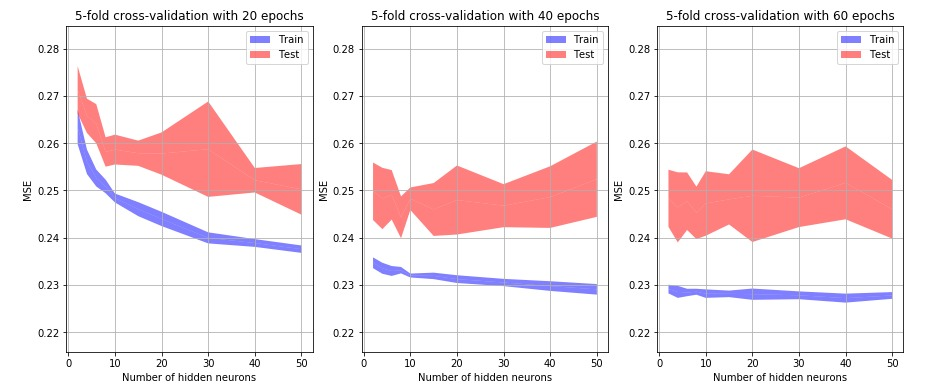




0.3 = 

MSE training:  0.0124390086206

MSE test:  0.0142365535666

Confusion matrix:

[[ 100.    0.]
 [   0.  100.]]
 
0.4= 
 
MSE training:  0.0373516399849

MSE test:  0.0427644362692

Confusion matrix:

[[ 99.   1.]
 [  1.  99.]]
 
0.5 = 
 
MSE training:  0.0942067052675

MSE test:  0.102583166413

Confusion matrix:

[[ 97.   3.]
 [  3.  97.]]
In [ ]:

0.6=

MSE training:  0.156408352356

MSE test:  0.16023792903

Confusion matrix:

[[ 95.   5.]
 [  4.  96.]]

0.7 =

MSE training:  0.288646301549

MSE test:  0.30553007571

Confusion matrix:

[[ 90.  10.]
 [ 10.  90.]]
